In [15]:
# Ref: https://www.youtube.com/watch?v=KGWbbAUcC0I
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

In [16]:
%matplotlib inline

In [17]:
y = np.random.random(100)
x = np.arange(len(y))

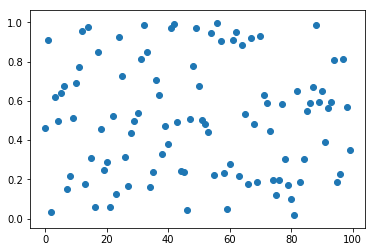

In [18]:
plt.scatter(x,y)

In [19]:
y[14] = 9
y[83] = 10

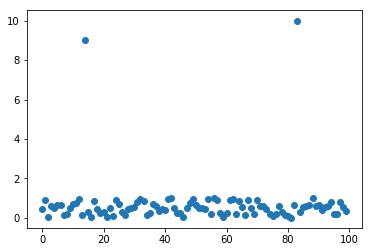

In [20]:
plt.scatter(x,y)

In [21]:
def grubbs_stat(y):
    std_dev = np.std(y)
    avg_y = np.mean(y)
    abs_val_minus_avg = abs(y - avg_y)
    max_of_deviations = max(abs_val_minus_avg)
    max_in = np.argmax(abs_val_minus_avg)
    Gcal = max_of_deviations/ std_dev
    print("Grubbs Statistics Value : {}".format(Gcal))
    return Gcal, max_in

In [22]:

def calculate_critical_value(size, alpha):
    t_dist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(t_dist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
    critical_value = numerator / denominator
    print("Grubbs Critical Value: {}".format(critical_value))
    return critical_value

In [23]:
def check_G_values(Gs, Gc, inp, max_index):
    if Gs > Gc:
        print('{} is an outlier. G > G-critical: {:.4f} > {:.4f} \n'.format(inp[max_index], Gs, Gc))
    else:
        print('{} is not an outlier. G > G-critical: {:.4f} > {:.4f} \n'.format(inp[max_index], Gs, Gc))

In [24]:
def ESD_Test(input_series, alpha, max_outliers):
    for iterations in range(max_outliers):
        Gcritical = calculate_critical_value(len(input_series), alpha)
        Gstat, max_index = grubbs_stat(input_series)
        check_G_values(Gstat, Gcritical, input_series, max_index)
        input_series = np.delete(input_series, max_index)

In [25]:

ESD_Test(y, 0.05, 3)

Grubbs Critical Value: 3.384082902288351
Grubbs Statistics Value : 7.206099431527864
10.0 is an outlier. G > G-critical: 7.2061 > 3.3841 

Grubbs Critical Value: 3.380650508067058
Grubbs Statistics Value : 9.386970637354258
9.0 is an outlier. G > G-critical: 9.3870 > 3.3807 

Grubbs Critical Value: 3.377175980782947
Grubbs Statistics Value : 1.7254984097084678
0.9975201185392806 is not an outlier. G > G-critical: 1.7255 > 3.3772 

